## Top 10 arrival airports in the world in 2013 (using the bookings file)

Arrival airport is the column arr_port. It is the IATA code for the airport

To get the total number of passengers for an airport, you can sum the "pax" column, grouping by arr_port.

Note that there is negative pax. That corresponds to cancelations. So to get the total number of passengers that have actually booked, you should sum including the negatives (that will remove the canceled bookings).

Print the top 10 arrival airports in the standard output, including the number of passengers.

Bonus point: Get the name of the city or airport corresponding to that airport (programatically, we suggest to have a look at [neobase in Github](https://github.com/alexprengere/neobase))

Bonus point: Solve this problem using pandas (instead of any other approach)


Suggestion: follow the below plan of action:

* Get familiar with the data
* Select columns of interest
* Decide what to do with NaNs

* Make processing plan
* Develop code that works with a sample

* Adjust the code to work with Big data
* Test big data approach on a sample

* Run program with big data


In [1]:
k= 0
for num in range(10):
    k +=1
    print('Número: %s, Contador: %s'%(num,k))
    

Número: 0, Contador: 1
Número: 1, Contador: 2
Número: 2, Contador: 3
Número: 3, Contador: 4
Número: 4, Contador: 5
Número: 5, Contador: 6
Número: 6, Contador: 7
Número: 7, Contador: 8
Número: 8, Contador: 9
Número: 9, Contador: 10


In [2]:

for k,num in enumerate(range(10)):
    print('Número: %s, Contador: %s'%(num,k+1))

Número: 0, Contador: 1
Número: 1, Contador: 2
Número: 2, Contador: 3
Número: 3, Contador: 4
Número: 4, Contador: 5
Número: 5, Contador: 6
Número: 6, Contador: 7
Número: 7, Contador: 8
Número: 8, Contador: 9
Número: 9, Contador: 10


## 1) Get familiar with data

In [3]:
pwd

'/home/dsc/Repos/AmadeusChallenge/KSchool'

In [4]:
cd ~/Data/challenge/

/home/dsc/Data/challenge


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
# Reading the compressed file with nrows. it's similar to create a sample

b = pd.read_csv('bookings.csv.bz2', sep='^', nrows=10000)

In [7]:
b.shape

(10000, 38)

In [8]:
b.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 38 columns):
act_date               10000 non-null object
source                 10000 non-null object
pos_ctry               10000 non-null object
pos_iata               10000 non-null object
pos_oid                10000 non-null object
rloc                   10000 non-null object
cre_date               10000 non-null object
duration               10000 non-null int64
distance               10000 non-null int64
dep_port               10000 non-null object
dep_city               10000 non-null object
dep_ctry               10000 non-null object
arr_port               10000 non-null object
arr_city               10000 non-null object
arr_ctry               10000 non-null object
lst_port               10000 non-null object
lst_city               10000 non-null object
lst_ctry               10000 non-null object
brd_port               10000 non-null object
brd_city               10000 non-null o

In [9]:
b.describe()

,duration,distance,intl,pax,year,month
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.0,10000.0
mean,20209.543000,455.563300,0.596300,0.516300,2013.0,3.0
std,42241.125937,1738.810081,0.490663,1.783943,0.0,0.0
min,59.000000,0.000000,0.000000,-25.000000,2013.0,3.0
25%,3339.000000,0.000000,0.000000,-1.000000,2013.0,3.0
50%,7734.500000,0.000000,1.000000,1.000000,2013.0,3.0
75%,19077.000000,0.000000,1.000000,1.000000,2013.0,3.0
max,488131.000000,18481.000000,1.000000,25.000000,2013.0,3.0


In [10]:
b.dtypes

act_date               object
source                 object
pos_ctry               object
pos_iata               object
pos_oid                object
rloc                   object
cre_date               object
duration                int64
distance                int64
dep_port               object
dep_city               object
dep_ctry               object
arr_port               object
arr_city               object
arr_ctry               object
lst_port               object
lst_city               object
lst_ctry               object
brd_port               object
brd_city               object
brd_ctry               object
off_port               object
off_city               object
off_ctry               object
mkt_port               object
mkt_city               object
mkt_ctry               object
intl                    int64
route                  object
carrier                object
bkg_class              object
cab_class              object
brd_time               object
off_time  

In [11]:
list(b.columns)

['act_date           ',
 'source',
 'pos_ctry',
 'pos_iata',
 'pos_oid  ',
 'rloc          ',
 'cre_date           ',
 'duration',
 'distance',
 'dep_port',
 'dep_city',
 'dep_ctry',
 'arr_port',
 'arr_city',
 'arr_ctry',
 'lst_port',
 'lst_city',
 'lst_ctry',
 'brd_port',
 'brd_city',
 'brd_ctry',
 'off_port',
 'off_city',
 'off_ctry',
 'mkt_port',
 'mkt_city',
 'mkt_ctry',
 'intl',
 'route          ',
 'carrier',
 'bkg_class',
 'cab_class',
 'brd_time           ',
 'off_time           ',
 'pax',
 'year',
 'month',
 'oid      ']

In [12]:
# How many rows can you watch? How can i change this parameter?

pd.set_option('display.max_columns',50)

In [13]:
b.head()

,act_date,source,pos_ctry,pos_iata,pos_oid,rloc,cre_date,duration,distance,dep_port,dep_city,dep_ctry,arr_port,arr_city,arr_ctry,lst_port,lst_city,lst_ctry,brd_port,brd_city,brd_ctry,off_port,off_city,off_ctry,mkt_port,mkt_city,mkt_ctry,intl,route,carrier,bkg_class,cab_class,brd_time,off_time,pax,year,month,oid
0,2013-03-05 00:00:00,1A,DE,a68dd7ae953c8acfb187a1af2dcbe123,1a11ae49fcbf545fd2afc1a24d88d2b7,ea65900e72d71f4626378e2ebd298267,2013-02-22 00:00:00,1708,0,ZRH,ZRH,CH,LHR,LON,GB,ZRH,ZRH,CH,LHR,LON,GB,ZRH,ZRH,CH,LHRZRH,LONZRH,CHGB,1,LHRZRH,VI,T,Y,2013-03-07 08:50:00,2013-03-07 11:33:37,-1,2013,3,NULL
1,2013-03-26 00:00:00,1A,US,e612b9eeeee6f17f42d9b0d3b79e75ca,7437560d8f276d6d05eeb806d9e7edee,737295a86982c941f1c2da9a46a14043,2013-03-26 00:00:00,135270,0,SAL,SAL,SV,CLT,CLT,US,SAL,SAL,SV,SAL,SAL,SV,CLT,CLT,US,CLTSAL,CLTSAL,SVUS,1,SALATLCLT,NV,L,Y,2013-04-12 13:04:00,2013-04-12 22:05:40,1,2013,3,NULL
2,2013-03-26 00:00:00,1A,US,e612b9eeeee6f17f42d9b0d3b79e75ca,7437560d8f276d6d05eeb806d9e7edee,737295a86982c941f1c2da9a46a14043,2013-03-26 00:00:00,135270,0,SAL,SAL,SV,CLT,CLT,US,SAL,SAL,SV,CLT,CLT,US,SAL,SAL,SV,CLTSAL,CLTSAL,SVUS,1,CLTATLSAL,NV,U,Y,2013-07-15 07:00:00,2013-07-15 11:34:51,1,2013,3,NULL
3,2013-03-26 00:00:00,1A,AU,0f984b3bb6bd06661c95529bbd6193bc,36472c6dbaf7afec9136ac40364e2794,5ecf00fdcbcec761c43dc7285253d0c1,2013-03-26 00:00:00,30885,0,AKL,AKL,NZ,SVO,MOW,RU,AKL,AKL,NZ,AKL,AKL,NZ,SVO,MOW,RU,AKLSVO,AKLMOW,NZRU,1,AKLHKGSVO,XK,G,Y,2013-04-24 23:59:00,2013-04-25 16:06:31,1,2013,3,SYDA82546
4,2013-03-26 00:00:00,1A,AU,0f984b3bb6bd06661c95529bbd6193bc,36472c6dbaf7afec9136ac40364e2794,5ecf00fdcbcec761c43dc7285253d0c1,2013-03-26 00:00:00,30885,0,AKL,AKL,NZ,SVO,MOW,RU,AKL,AKL,NZ,SVO,MOW,RU,AKL,AKL,NZ,AKLSVO,AKLMOW,NZRU,1,SVOHKGAKL,XK,G,Y,2013-05-14 20:15:00,2013-05-16 10:44:50,1,2013,3,SYDA82546


### What if we dont want to read the whole file?

Options:

* prepare the sample

* read_csv with nrows option

Clean the column names

## 2) Select the columns of interest 

In [14]:
b = pd.read_csv('bookings.csv.bz2', sep='^', nrows=10000, usecols=['arr_port','pax','year'])

## 3) What to do with NaN?



In the sample everything might be ok, but we should prepare for NaN case

In [15]:
b.info()
b.dropna(inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
arr_port    10000 non-null object
pax         10000 non-null int64
year        10000 non-null int64
dtypes: int64(2), object(1)
memory usage: 234.5+ KB


## 4) Make processing plan
1) get only the bookings from 2013

2) group by arr_port, sum

3) sort 

4) get top 10

#### 4.1) Get only the booking from 2013

In [16]:
b = b[b['year'] == 2013]

In [17]:
b.drop(columns='year', inplace=True)

#### 4.2) group by arr_port, sum

In [18]:
top10S = b.groupby('arr_port')[['arr_port','pax']].sum().sort_values(by= 'pax',ascending=False).head(10)
top10S.head(10)

,pax
arr_port,
HKG,112
LGA,95
ORD,94
JFK,92
LAX,91
SFO,91
MCO,90
DCA,82
DEN,79


In [19]:
top10DF = top10S.reset_index().head(10)
top10DF

,arr_port,pax
0,HKG,112
1,LGA,95
2,ORD,94
3,JFK,92
4,LAX,91
5,SFO,91
6,MCO,90
7,DCA,82
8,DEN,79
9,LHR,76


In [20]:
top10S.index = top10S.index.str.slice(0,3)
top10S.index

Index(['HKG', 'LGA', 'ORD', 'JFK', 'LAX', 'SFO', 'MCO', 'DCA', 'DEN', 'LHR'], dtype='object', name='arr_port')

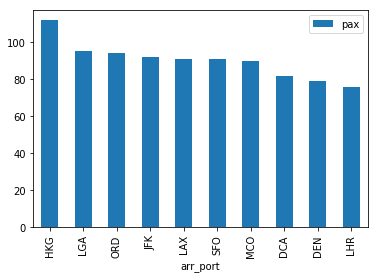

In [21]:
top10S.plot(kind='bar');


In [22]:
import seaborn as sns

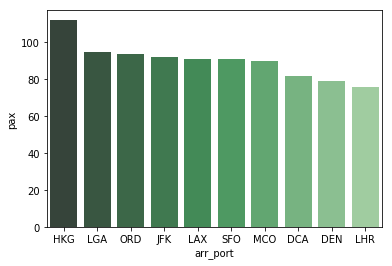

In [23]:
sns.barplot(top10S.index,top10S['pax'],palette="Greens_d");

In [24]:
import pandas as pd
b = pd.read_csv('bookings.csv.bz2', sep='^', nrows=10000, usecols=['arr_port','pax','year'])
b.dropna(inplace=True)
b = b[b['year'] == 2013]
b.drop(columns='year', inplace=True)
top10S = b.groupby('arr_port')[['arr_port','pax']].sum().sort_values(by= 'pax',ascending=False).head(10)
top10S

,pax
arr_port,
HKG,112
LGA,95
ORD,94
JFK,92
LAX,91
SFO,91
MCO,90
DCA,82
DEN,79


## 5) Adjust the code to work with Big data


Hint: check out https://pandas.pydata.org/pandas-docs/stable/io.html#io-chunking

### First Way: Iterator =  True

In [25]:
b = pd.read_csv('bookings.csv.bz2', sep='^', usecols=['arr_port','pax','year'], nrows=1000)

In [26]:
type(b)

pandas.core.frame.DataFrame

In [27]:
bc = pd.read_csv('bookings.csv.bz2', sep='^', usecols=['arr_port','pax','year'],nrows=10000,iterator=True)

In [28]:
type(bc)

pandas.io.parsers.TextFileReader

In [29]:
#How many rows do i want to take?

b0 = bc.get_chunk(6000)

In [30]:
type(b0)

pandas.core.frame.DataFrame

In [31]:
b0.shape

(6000, 3)

In [32]:
b1 = bc.get_chunk(3000)

In [33]:
b1.shape

(3000, 3)

In [34]:
# Trying to get 5000 but indeed we have only 1000 rows

b2 = bc.get_chunk(5000)

In [35]:
b2.shape

(1000, 3)

### Second Way: chunksize = number of lines you need

In [36]:
bc = pd.read_csv('bookings.csv.bz2', sep='^', usecols=['arr_port','pax','year'], nrows=10000, chunksize=3000)

In [37]:
for i,chunk in enumerate(bc):
    print('Chunk Number %s'%(i+1))
    print('Chunk Len %s'%(len(chunk)))
    print(chunk.head())
    print('----------------------------')


Chunk Number 1
Chunk Len 3000
   arr_port  pax  year
0  LHR        -1  2013
1  CLT         1  2013
2  CLT         1  2013
3  SVO         1  2013
4  SVO         1  2013
----------------------------
Chunk Number 2
Chunk Len 3000
      arr_port  pax  year
3000  DEN         1  2013
3001  LAX         1  2013
3002  LAX         1  2013
3003  BUF         2  2013
3004  PVG         1  2013
----------------------------
Chunk Number 3
Chunk Len 3000
      arr_port  pax  year
6000  BOS         1  2013
6001  BOS        -1  2013
6002  BOS        -1  2013
6003  BOS         1  2013
6004  PHX         1  2013
----------------------------
Chunk Number 4
Chunk Len 1000
      arr_port  pax  year
9000  LGA        -1  2013
9001  LGA         1  2013
9002  GIG         1  2013
9003  GIG         1  2013
9004  GIG        -1  2013
----------------------------


In [38]:
bc = pd.read_csv('bookings.csv.bz2', sep='^', nrows=10000, usecols=['arr_port','pax','year'], chunksize=3000)

all_chunks = pd.DataFrame()

for i,chunk in enumerate(bc):
    
    print('Chunk Number %s'%(i+1))
    print('Chunk Length: %s'%(len(chunk)))
    print('----------------------------')
    b= chunk.dropna()
    b = b[b['year'] == 2013]
    b.drop(columns='year', inplace=True)
    small_chunk_result = b.groupby('arr_port').sum()
    all_chunks = all_chunks.append(small_chunk_result)

top_airports = all_chunks.groupby('arr_port').sum().sort_values(by='pax',ascending=False)
top_airports.head(10)

Chunk Number 1
Chunk Length: 3000
----------------------------
Chunk Number 2
Chunk Length: 3000
----------------------------
Chunk Number 3
Chunk Length: 3000
----------------------------
Chunk Number 4
Chunk Length: 1000
----------------------------


,pax
arr_port,
HKG,112
LGA,95
ORD,94
JFK,92
LAX,91
SFO,91
MCO,90
DCA,82
DEN,79


#### Now we need to put together the results from all the chunks

Options:

* df.append()

* pd.concat()
    
    
pd.concat handles several DataFrames in one go, while df.append creates a new DataFrame every time we call it.

## Complete Solution

In [39]:
bc = pd.read_csv('bookings.csv.bz2', sep='^',usecols=['arr_port','pax','year'], chunksize=1000000)

all_chunks = pd.DataFrame()

for i,chunk in enumerate(bc):
    
    print('Chunk Number %s'%(i+1))
    print('Chunk Length: %s'%(len(chunk)))
    print('----------------------------')
    b= chunk.dropna()
    b = b[b['year'] == 2013]
    b.drop(columns='year', inplace=True)
    small_chunk_result = b.groupby('arr_port').sum()
    all_chunks = all_chunks.append(small_chunk_result)

top_airports = all_chunks.groupby('arr_port').sum().sort_values(by='pax',ascending=False)

Chunk Number 1
Chunk Length: 1000000
----------------------------
Chunk Number 2
Chunk Length: 1000000
----------------------------
Chunk Number 3
Chunk Length: 1000000
----------------------------
Chunk Number 4
Chunk Length: 1000000
----------------------------
Chunk Number 5
Chunk Length: 1000000
----------------------------
Chunk Number 6
Chunk Length: 1000000
----------------------------
Chunk Number 7
Chunk Length: 1000000
----------------------------
Chunk Number 8
Chunk Length: 1000000
----------------------------
Chunk Number 9
Chunk Length: 1000000
----------------------------
Chunk Number 10
Chunk Length: 1000000
----------------------------
Chunk Number 11
Chunk Length: 10
----------------------------


In [40]:
top_airports.head()

,pax
arr_port,
LHR,88809.0
MCO,70930.0
LAX,70530.0
LAS,69630.0
JFK,66270.0


In [41]:
# There are many whitespaces!!! Be aware of this

list(top_airports.index)[0:10]

['LHR     ',
 'MCO     ',
 'LAX     ',
 'LAS     ',
 'JFK     ',
 'CDG     ',
 'BKK     ',
 'MIA     ',
 'SFO     ',
 'DXB     ']

In [42]:
# Doing this we can remove these whitespaces

top_airports.index.str.slice(0,3)

Index(['LHR', 'MCO', 'LAX', 'LAS', 'JFK', 'CDG', 'BKK', 'MIA', 'SFO', 'DXB',
       ...
       'KUU', 'FLW', 'MUA', 'CXR', 'SDJ', 'MYJ', 'UPG', 'XWG', 'MZV', 'AYQ'],
      dtype='object', name='arr_port', length=2274)

### Airport Names

Using [neobase](https://github.com/alexprengere/neobase), the successor to GeoBases. It's a referential data library that particularly focuses on airports.

In [43]:
from neobase import NeoBase

In [44]:
b = NeoBase()

In [45]:
b.get('ORY', 'city_code_list')

['PAR']

In [46]:
b.get('ORY', 'city_name_list')

['Paris']

In [47]:
b.get('ORY', 'country_code')

'FR'

In [48]:
b.distance('ORY', 'CDG')

34.87480576468853

In [49]:
b.get_location('ORY')

LatLng(lat=48.72528, lng=2.35944)

In [50]:
b.get('ALC', 'name')

'Alicante–Elche Airport'

In [51]:
b.FIELDS

(('iata_code', 0, None),
 ('name', 6, None),
 ('lat', 8, None),
 ('lng', 9, None),
 ('page_rank', 12, <function neobase.neobase.NeoBase.<lambda>>),
 ('country_code', 16, None),
 ('country_name', 18, None),
 ('continent_name', 19, None),
 ('timezone', 31, None),
 ('city_code_list', 36, <function neobase.neobase.NeoBase.<lambda>>),
 ('city_name_list', 37, <function neobase.neobase.NeoBase.<lambda>>),
 ('location_type', 41, list),
 ('currency', 46, None))

In [52]:
top_airports.reset_index(inplace=True)

In [53]:
top_airports.head()

,arr_port,pax
0,LHR,88809.0
1,MCO,70930.0
2,LAX,70530.0
3,LAS,69630.0
4,JFK,66270.0


In [63]:
top_airports = top_airports[top_airports['arr_port'] != top_airports['arr_port'].str.contains('CPQ')]

In [64]:
top_airports['Airport_Name'] = top_airports['arr_port'].map(lambda x: b.get(x.rstrip(), 'name'))
top_airports.head(10)

,arr_port,pax,Airport_Name
0,LHR,88809.0,London Heathrow Airport
1,MCO,70930.0,Orlando International Airport
2,LAX,70530.0,Los Angeles International Airport
3,LAS,69630.0,McCarran International Airport
4,JFK,66270.0,John F. Kennedy International Airport
5,CDG,64490.0,Paris Charles de Gaulle Airport
6,BKK,59460.0,Suvarnabhumi Airport
7,MIA,58150.0,Miami International Airport
8,SFO,58000.0,San Francisco International Airport
9,DXB,55590.0,Dubai International Airport


In [62]:
top_airports.to_csv('/home/dsc/Repos/AmadeusChallenge/KSchool/top_airports.csv', sep='^', index=False)

### An Alternative

Chunking with pandas DataFrames is a very general technique that can be applied to lots of datasets that don't fit in memory. It is useful to know because it's very widely applicable.

However, very often small optimizations and tricks will allow us to get the job done, and they may be even quicker. 

In this case, the dataset is pretty close to fitting in memory, so just using the usecols argument to read_csv can get us there. It will only load the three relevant columns to start with.